Εργαστήριο “Νευρωνικά Δίκτυα & Ευφυή Υπολογιστικά Συστήματα” 2018-2019
# Άσκηση 1. Επιβλεπόμενη μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository

## Dataset B02: EEG Eye State Data Set


## A. Στοιχεία Ομάδας.


Αριθμός Ομάδας --> B9

> 

1.   Καναβάκης Ελευθέριος 03114180
2.   Λιάρτης Ιάσον 03114161

## Β. Εισαγωγή του Dataset.

1. Το dataset B02 περιέχει μετρήσεις από __ένα εγκεφαλογράφημα που διήρκησε 117 δευτερόλεπτα__. Όλες οι μετρήσεις προέρχονται από ένα υποκείμενο. Το dataset περιέχει τις μετρήσεις όπως καταγράφηκαν με χρονολογική σειρά, με την πρώτη μέτρηση που καταγράφηκε να αποτελεί το πρώτο row του dataset. Η τελευταία τιμή κάθε row, που αποτελεί και την κλάση ως προς την οποία θα πρέπει να ταξινομίσουμε το dataset, αντιστοιχεί στην κατάσταση του ματίου του υποκειμένου από το οποίο λήφθηκαν οι μετρήσεις. __Η τιμή 0 αντιστοιχεί σε ανοιχτό μάτι και η τιμή 1 σε κλειστό μάτι__. Οι τιμές αυτές προστέθηκαν στο dataset μετά την ολοκλήρωση των υπόλοιπων μετρήσεων με το χέρι. Η ανάθεση των τιμών έγινε με τη βοήθεια μιας βιντεοκάμερας που κατέγραφε τη κατάσταση του ματίου κατά τη διάρκεια του πειράματος. Αυτό το γεγονός μας προϊδεάζει για λανθασμένες τιμές για την κλάση στην οποία ανήκει κάθε μέτρηση λόγω ανθρωπίνων σφαλμάτων.  
Κάθε row περιέχει __14 άλλες τιμές που είναι και τα features__ ως προς τα οποία θα κάνουμε την ταξινόμιση. Οι τιμές αυτές αντιστοιχούν σε διαφορετικά __ηλεκτρόδια από τα οποία λαμβάνονταν μετρήσεις__. Η ονομασία του κάθε ηλεκτροδίου προκύπτει από την σύμβαση [Modified Combinatorial Nomenclature](https://www.acns.org/pdf/guidelines/Guideline-5.pdf) (MCN). Η σύμβαση αντιστοιχίζει ένα γράμμα σε κάθε ηλεκτρόδιο ανάλογα με τον λοβό πάνω από τον οποίο έχει τοποθετηθεί και έναν αριθμό (και το γράμμα Ζ που δηλώνει το 0) που προκύπτει από το οβελιαίο επίπεδο και το ημισφαίριο στο οποίο βρίσκεται το ηλεκτρόδιο. Η σύμβαση απεικονίζεται στην παρακάτω εικόνα.
![Modified Combinatorial Nomenclature](https://i.imgur.com/6CzlaPz.jpg)  
Τα ηλεκτρόδια από τα οποία πάρθηκαν οι μετρήσεις είναι τα εξής: AF3, F7, F3, FC5, T7, P7, O1,O2, P8, T8, FC6, F4, F8, AF4. Τα ηλεκτρόδια αυτά έχουν επισημειωθεί με κίτρινο.

In [0]:
# uploading dataset

from google.colab import files
files.upload()

Saving EEG Eye State.arff to EEG Eye State (2).arff


{'EEG Eye State.arff': b'@RELATION EEG_DATA\r\n\r\n@ATTRIBUTE AF3 NUMERIC\r\n@ATTRIBUTE F7 NUMERIC\r\n@ATTRIBUTE F3 NUMERIC\r\n@ATTRIBUTE FC5 NUMERIC\r\n@ATTRIBUTE T7 NUMERIC\r\n@ATTRIBUTE P7 NUMERIC\r\n@ATTRIBUTE O1 NUMERIC\r\n@ATTRIBUTE O2 NUMERIC\r\n@ATTRIBUTE P8 NUMERIC\r\n@ATTRIBUTE T8 NUMERIC\r\n@ATTRIBUTE FC6 NUMERIC\r\n@ATTRIBUTE F4 NUMERIC\r\n@ATTRIBUTE F8 NUMERIC\r\n@ATTRIBUTE AF4 NUMERIC\r\n@ATTRIBUTE eyeDetection {0,1}\r\n\r\n@DATA\r\n4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.9,4393.85,0\r\n4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.1,0\r\n4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0\r\n4328.72,4011.79,4296.41,4155.9,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0\r\n4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.9,4627.69,4210.77,4244.1,4212.8

In [0]:
# check if upload was completed correctly

!ls

'EEG Eye State.arff'   sample_data


In [0]:
# read dataset

from scipy.io import arff
import pandas as pd

data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(data[0])

df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [0]:
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 14980
Number of columns: 15


2. Όπως είδαμε στη περιγραφή του dataset αλλά όπως βλέπουμε και τώρα, το dataset αποτελείται από __14980 μετρήσεις__ και περιέχει __14 χαρακτηριστικά__, χωρίς να περιλαμβάνουμε την στήλη που μας δίνει την κλάση.

3. Το αρχείο του dataset __περιείχε επικεφαλίδες__, αλλά όχι με την κλασσική μορφή των αρχείων csv, αφού το αρχείο ήταν δομημένο με βάση τη μορφή arff. Αυτός ήταν και ο λόγος που χρησιμοποιήσαμε την συνάρτηση της βιβλιοθήκης scipy, `io.arff.loadrff` πριν χρησιμοποιήσουμε τα pandas για να διαβάσουμε το αρχείο. Οι επικεφαλίδες είναι τα ονόματα των ηλεκτροδίων που αναφέραμε και παραπάνω καθώς και η επικεφαλίδα `eyeDetection` για τη στήλη της κλάσης. Το αρχείο του dataset __δεν περιείχε αρίθμηση στις γραμμές__.

In [0]:
# print class labels

print(df['eyeDetection'].unique())

[b'0' b'1']


4. Όπως βλέπουμε __οι ετικέτες των κλάσεων είναι οι `b'0', b'1'`__ και βρίσκονται στην τελευταία στήλη.

5. Το αρχείο text __δεν χρειάστηκε κάποια προεπεξεργασία με το χέρι__.

In [0]:
# check for missing values

df.isnull().values.any()

False

6. Όπως βλέπουμε, __το αρχείο δεν έχει καμία απουσιάζουσα τιμή__.

In [0]:
# print statistics for classes

print(df['eyeDetection'].value_counts(normalize=True))


b'0'    0.551202
b'1'    0.448798
Name: eyeDetection, dtype: float64


7. Όπως έχουμε ήδη δει, __ο αριθμός των κλάσεων είναι 2__. Η κλάση 0, δηλαδή ανοιχτό μάτι, περιέχει το __55.12%__ των δειγμάτων ενώ η κλάση 1, δηλαδή κλειστό μάτι, περιέχει το __44.88%__ των δειγμάτων. Επομένως, __το dataset είναι ισορροπημένο__.

In [0]:
# spliting dataset with 40% test set

from sklearn.model_selection import train_test_split

X = df.values[:,:-1].astype(float)
y = df.values[:,-1].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

8. Διαχωρίσαμε το dataset σε train και σε test, με το test να έχει μέγεθος 40% επί του συνόλου. Εφόσον δεν υπήρχαν απουσιάζουσες τιμές ή μη διατεταγμένα χαρακτηριστικά δεν χρειάστηκε να κάνουμε κάτι σύνθετο.

## Γ. Baseline Classification

### 1. Εκπαίδευση

#### α) Dummy Classifier

In [0]:
# training classifier

from sklearn.dummy import DummyClassifier

clf = DummyClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

Confusion matrix, without normalization


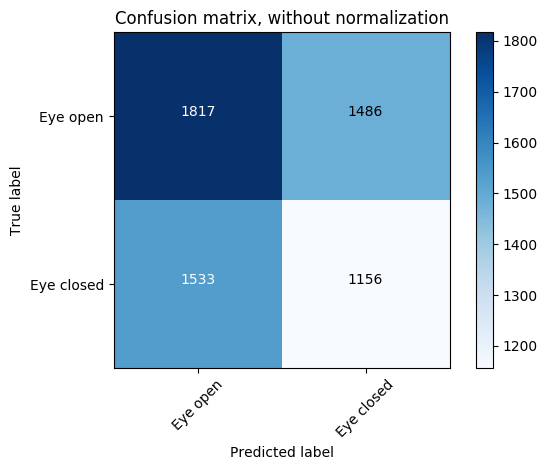

Normalized confusion matrix


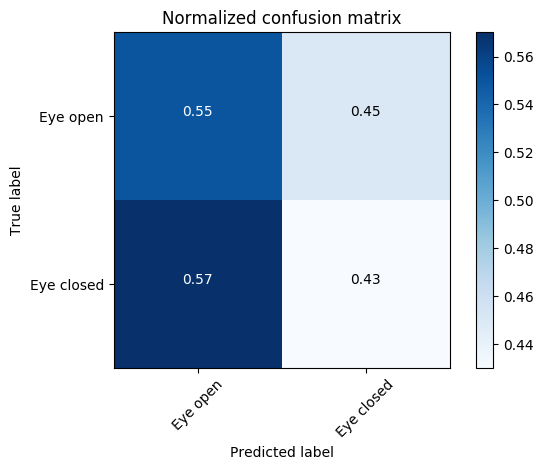

In [0]:
# calcualting / plotting confusion matrix
# implementation from: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.rcdefaults()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid('off')

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min())/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# calculating f1-score

from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
print(classification_report(y_test, y_pred, target_names=class_names))

precision = {}
recall = {}
f1_micro = {}
f1_macro = {}

precision['dummy'] = precision_score(y_test, y_pred, average='binary')
recall['dummy'] = recall_score(y_test, y_pred, average='binary')
f1_micro['dummy'] = f1_score(y_test, y_pred, average='micro')
f1_macro['dummy'] = f1_score(y_test, y_pred, average='macro')

              precision    recall  f1-score   support

    Eye open       0.54      0.55      0.55      3303
  Eye closed       0.44      0.43      0.43      2689

   micro avg       0.50      0.50      0.50      5992
   macro avg       0.49      0.49      0.49      5992
weighted avg       0.50      0.50      0.50      5992



#### β) Gaussian Naive Bayes

In [0]:
# training classifier

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)

Confusion matrix, without normalization


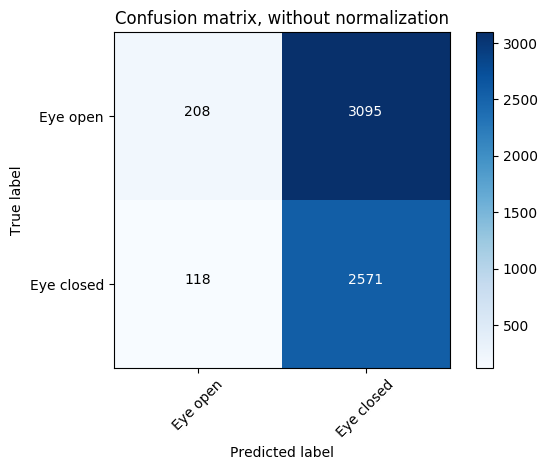

Normalized confusion matrix


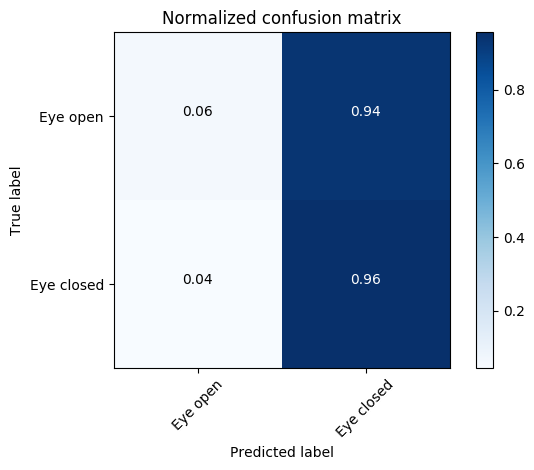

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
print(classification_report(y_test, y_pred, target_names=class_names))

precision['gnb'] = precision_score(y_test, y_pred, average='binary')
recall['gnb'] = recall_score(y_test, y_pred, average='binary')
f1_micro['gnb'] = f1_score(y_test, y_pred, average='micro')
f1_macro['gnb'] = f1_score(y_test, y_pred, average='macro')

              precision    recall  f1-score   support

    Eye open       0.64      0.06      0.11      3303
  Eye closed       0.45      0.96      0.62      2689

   micro avg       0.46      0.46      0.46      5992
   macro avg       0.55      0.51      0.37      5992
weighted avg       0.56      0.46      0.34      5992



#### γ) kNN

In [0]:
# training classifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

Confusion matrix, without normalization


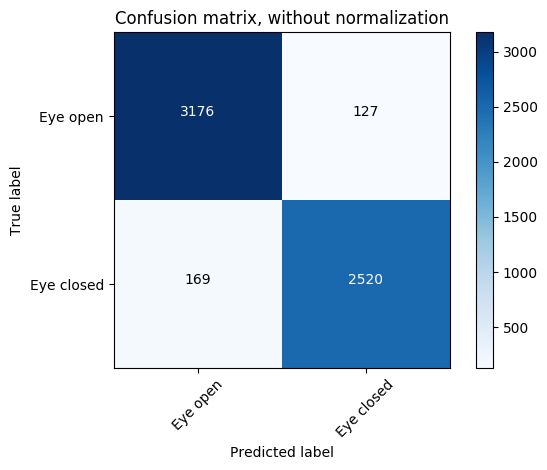

Normalized confusion matrix


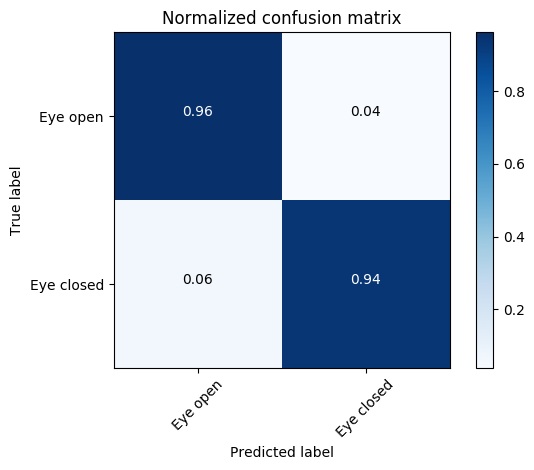

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
print(classification_report(y_test, y_pred, target_names=class_names))

precision['knn'] = precision_score(y_test, y_pred, average='binary')
recall['knn'] = recall_score(y_test, y_pred, average='binary')
f1_micro['knn'] = f1_score(y_test, y_pred, average='micro')
f1_macro['knn'] = f1_score(y_test, y_pred, average='macro')

              precision    recall  f1-score   support

    Eye open       0.95      0.96      0.96      3303
  Eye closed       0.95      0.94      0.94      2689

   micro avg       0.95      0.95      0.95      5992
   macro avg       0.95      0.95      0.95      5992
weighted avg       0.95      0.95      0.95      5992



#### δ) Multi-Layer Perceptron

In [0]:
# training classifier

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

Confusion matrix, without normalization


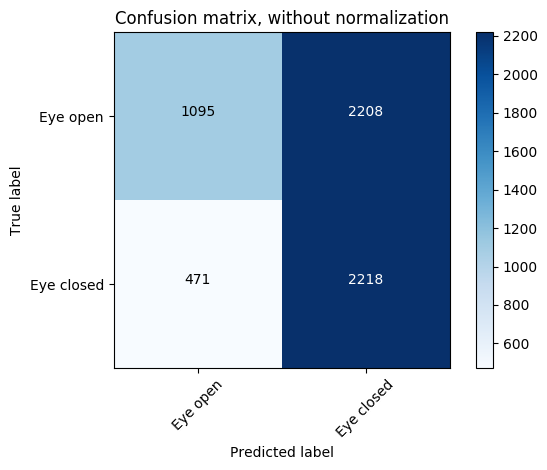

Normalized confusion matrix


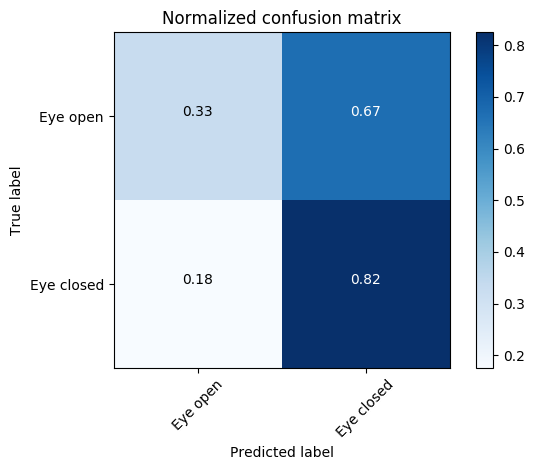

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
print(classification_report(y_test, y_pred, target_names=class_names))

precision['mlp'] = precision_score(y_test, y_pred, average='binary')
recall['mlp'] = recall_score(y_test, y_pred, average='binary')
f1_micro['mlp'] = f1_score(y_test, y_pred, average='micro')
f1_macro['mlp'] = f1_score(y_test, y_pred, average='macro')

              precision    recall  f1-score   support

    Eye open       0.70      0.33      0.45      3303
  Eye closed       0.50      0.82      0.62      2689

   micro avg       0.55      0.55      0.55      5992
   macro avg       0.60      0.58      0.54      5992
weighted avg       0.61      0.55      0.53      5992



### 2. Bar Plots

#### F1 - micro

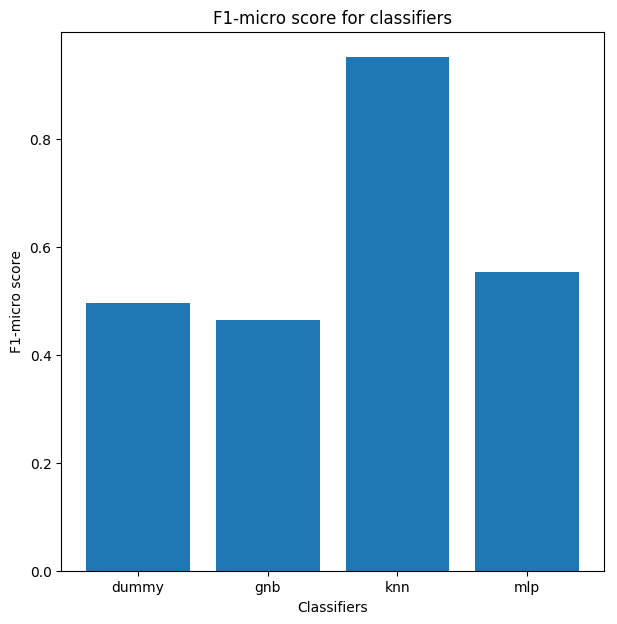

In [0]:
plt.figure(figsize=(7,7))
plt.bar(range(1,5), f1_micro.values())
plt.xticks(range(1,5), f1_micro.keys())
plt.grid('off')
plt.xlabel('Classifiers')
plt.ylabel('F1-micro score')
plt.title('F1-micro score for classifiers')
plt.show()

#### F1 - macro

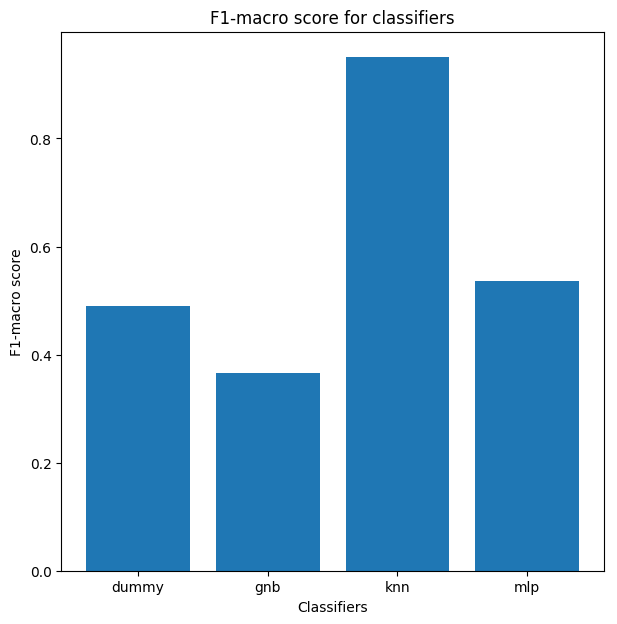

In [0]:
plt.figure(figsize=(7,7))
plt.bar(range(1,5), f1_macro.values())
plt.xticks(range(1,5), f1_macro.keys())
plt.grid('off')
plt.xlabel('Classifiers')
plt.ylabel('F1-macro score')
plt.title('F1-macro score for classifiers')
plt.show()

### 3. Σχολιασμός αποτελεσμάτων

In [0]:
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-micro: {}'.format(f1_micro))
print('F1-macro: {}'.format(f1_macro))

Precision: {'dummy': 0.4457056375331063, 'gnb': 0.453759265795976, 'knn': 0.9520211560256895, 'mlp': 0.5707317073170731}
Recall: {'dummy': 0.4380810710301227, 'gnb': 0.956117515805132, 'knn': 0.9371513573819263, 'mlp': 0.1305317962067683}
F1-micro: {'dummy': 0.5033377837116155, 'gnb': 0.463785046728972, 'knn': 0.9506008010680908, 'mlp': 0.5657543391188251}
F1-macro: {'dummy': 0.49723810988826583, 'gnb': 0.3650359932184037, 'knn': 0.9500015335292643, 'mlp': 0.45635007420135903}


__Για τον dummy classifier__ τα αποτελέσματα είναι απολύτως αναμενόμενα. Εφόσον η default λειτουργία του είναι η stratified, επέλεγε συχνότερα την κλάση 0 με αποτέλεσμα η αντίστοιχη στήλη του confusion matrix να έχει υψηλότερα νούμερα, με τις κανονικοποιημένες τιμές να προσεγγίζουν την κατανομή του dataset. Επειδή όμως συχνότερη ήταν η κλάση 0 ενός προβλήματος binary ταξινόμισης επιβαρύνθηκαν αρκετά οι τιμές του precision και του recall. Η τιμή  του precision δίνεται από τον τύπο: $Precision = \frac{TP}{TP+FP}$ Στατιστικά αναμένουμε το μέγεθος αυτό να προσεγγίζει το ποσοστό του πληθυσμού που ανήκει στη κλάση 1 για την stratified εκδοχή του dummy. Αν και τα νούμερα δεν ταιριάζουν ακριβώς στον θεωρητικό υπολογισμό, είναι αρκετά κοντά. Αντίστοιχα αναμένουμε το ίδιο ακριβως αποτέλεσμα για το recall που δίνεται από τον τύπο: $Recall = \frac{TP}{TP+FN}$ Ο λόγος που τα νούμερα αυτά έχουν θεωρητικά την ίδια τιμη είναι γιατί η πιθανότητα ένα δείγμα να είναι στην κλάση 1 και η πιθανότητα να κατηγοριοποιηθεί στην κλάση 1 είναι ίσες.  


__Για τον Gaussian Naive Bayes και για το Multi-Layer Perceptron__ πρέπει να αναφερθεί, αρχικά, ότι τα αποτελέσματα είναι πολύ ασταθή. Όπως είναι αναμενόμενο, ο κώδικας που παρουσιάζουμε δεν γράφτηκε χωρίς να υποστεί διορθώσεις και τα αντίστοιχα κελιά έχουν εκτελεστεί πολλές φορές. Επομένως έχουμε δει πολύ περισσότερα αποτελέσματα από αυτά που παρουσιάζουμε. Μπορούμε να πούμε ότι τα αποτελέσματα του Gaussian Naive Bayes φαίνεται να εξαρτώνται πολύ από το train/test split, ενώ του Multi-Layer Perceptron ακόμα και για τον ίδιο διαχωρισμό του dataset επανειλημένες εκτελέσεις του ίδιου κώδικα θα δώσουν πολύ διαφορετικά αποτελέσματα. Σε κάθε περίπτωση και οι δύο ταξινομητές φαίνεται να είναι πολύ κακές επιλογές για το συγκεκριμένο dataset, χωρίς να έχουν υποστεί επεξεργασία τα δεδομένα (π.χ. κανονικοποίηση). Η θεωρία του κάθε ταξινομητή μας δίνει κάποιες ιδέες για το σε τι οφείλονται αυτά τα αποτελεματα. Ο Gaussian Naive Bayes κάνει τις εξής δύο υποθέσεις: ότι τα features είναι ανεξάρτητα και ότι ακολουθούν γκαουσιανή κατανομή. Λόγω της φύσεως του προβλήματος μπορούμε να πούμε ότι τα features δεν είναι ανεξάρτητα και ότι αυτή η παραδοχή αποτελεί μάλλον κακή προσέγγιση του προβλήματος. Η δραστηριότητα των διάφορων περιοχών του εγκεφάλου αναμένουμε να σχετίζεται. Η υπόθεση για την γκαουσσιανή κατανομή φαίνεται να ισχύει σε γενικές γραμμές αλλά η γκαουσιανή κατανομή κάποιων ηλεκτροδίων φαίνεται να είναι ίδια και στην κλάση 0 και στην κλάση 1 αφού το σχήμα της κατανομής είναι κοντά σε αυτό της μίας καμπάνας. Στο σχεδιασμό αυτών των γραφικών παραστάσεων φανερώνονται και οι λόγοι για τους οποίους το MLP δεν αποδίδει καλά. Καταρχάς βλέπουμε τιμές μεγάλες σε μέγεθος με μικρή ποσοστιαία διαφορά μεταξύ τους. Αυτό αφήνει πολύ μικρό περιθώριο στο MLP να τραβήξει με αποδοτικό τρόπο τα διαχωρισιτκά υπερεπίπεδα, ειδικά με τις default τιμές που δίνουν στο MLP μόνο ένα hidden layer. Ένα άλλο πρόβλημα που εντοπίζουμε είναι κάποιες τιμές που αποτελούν, εμφανώς, outliers. Είναι πολύ λίγες στο πλήθος και απέχουν πολλές τάξεις μεγέθους από τις υπόλοιπες. Αν το MLP ταξινομίσει λάθος μία μέτρηση με τιμές - outliers η ποινή που θα δεχτούν τα βάρη θα είναι υπερβολικά μεγάλη.

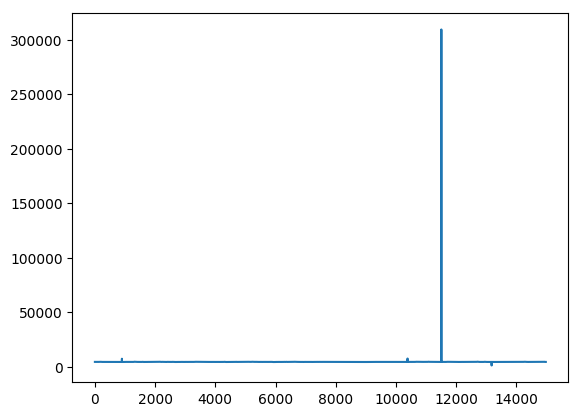

In [0]:
# plotting values for first electrode as they were recorded in time

plt.plot(X[:,0])
plt.show()

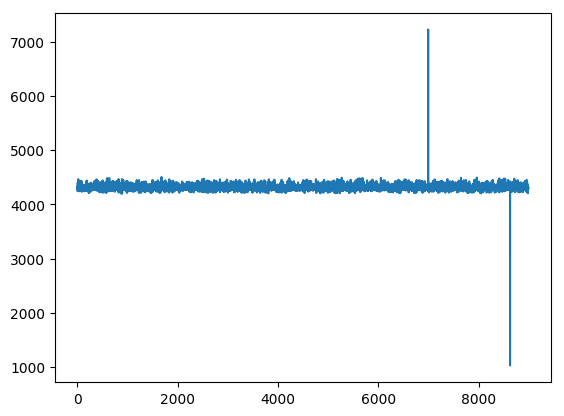

In [0]:
# plotting training values of the same electrode

plt.plot(X_train[:,0])
plt.show()

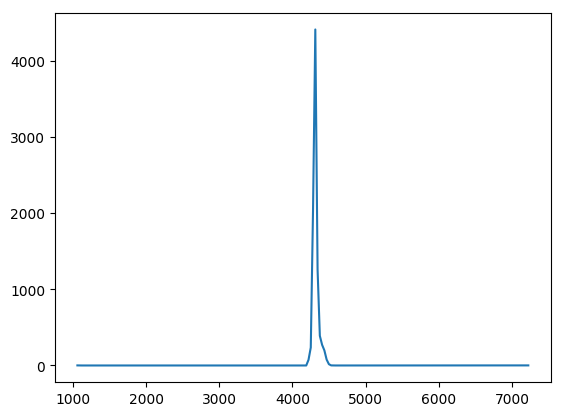

In [0]:
# making a histogram out of the training values as they are
# doesn't reveal much information beacuse of the outliers

rang = np.min(X_train[:,0]), np.max(X_train[:,0])
y_axis, x_axis = np.histogram(X_train[:,0], bins=200, range=rang)
plt.plot(x_axis[1:], y_axis)
plt.show()

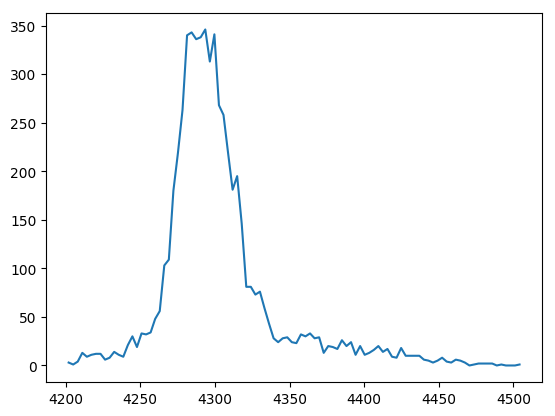

Mean value: 4301.894059047619
Standard deviation: 189.5866258469622


In [0]:
# based on the plot of the training values
# 0:6000 looks like a good area
# without outliers

rang = np.min(X_train[0:6000,0]), np.max(X_train[0:6000,0])
y_axis, x_axis = np.histogram(X_train[0:6000,0], bins=100, range=rang)
plt.plot(x_axis[1:], y_axis)
plt.show()
print('Mean value: {}'.format(np.mean(X_train[0:6000])))
print('Standard deviation: {}'.format(np.var(X_train[0:6000])**0.5))

Τα παραπάνω plots φανερώνουν τους outliers, την μια γκαουσσιανή καμπάνα που φαίνεται να ακολουθεί η κατανομή του πρώτου ηλεκτροδίου, καθώς και την μικρή τυπική απόκλιση σε σύγκριση με την μέση τιμή.

Τέλος, __για τον kNN__, παίρνουμε εξαιρετικά αποτελέσματα. Ο αλγόριθμος του kNN είναι ανθεκτικός σε όλα τα προβλήματα που σχολιάσαμε για τους GNB και MLP οπότε είναι αναμενόμενο να δουλεύει καλά ακόμα και χωρίς επεξεργασία των δεδομένων.

## Δ. Βελτιστοποίηση Ταξινομητών

### α) Dummy Classifier

Για τον Dummy Classifier δεν μπορούμε να βελτιστοποιήσουμε την απόδοση με τη προεπεξεργασία των features καθώς δεν τα χρησιμοποιεί για να ταξινομίσει. Μπορούμε όμως να εξετάσουμε την απόδοση του χρησιμοποιώοντας τις εναλλακτικές στρατηγικές ταξινόμισης.

#### i) F1-micro

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

params = {'strategy':('stratified', 'most_frequent', 'prior', 'uniform', 'constant'), 'constant':(0, 1)}

clf = GridSearchCV(DummyClassifier(), params, scoring='f1_micro', n_jobs=-1, iid=False, cv=5).fit(X_train, y_train)

In [0]:
print(clf.best_params_)

{'constant': 0, 'strategy': 'most_frequent'}


In [0]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization


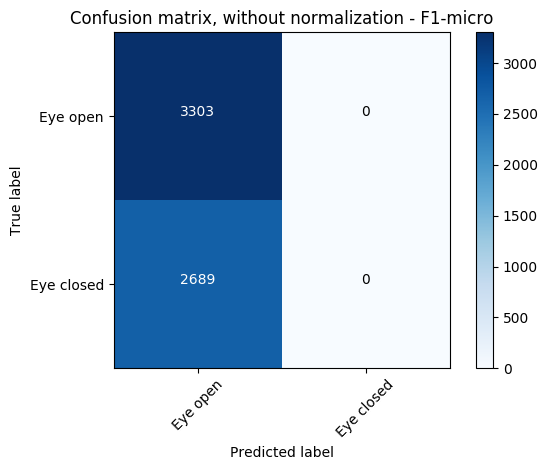

Normalized confusion matrix


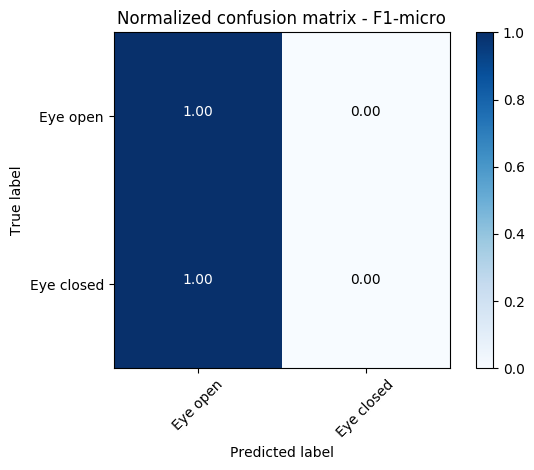

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

plt.rcdefaults()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid('off')

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min())/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-micro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-micro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 0.00%
Recall: 0.00%
F1-micro: 55.12%
F1-macro: 35.54%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### ii) F1-macro

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

params = {'strategy':('stratified', 'most_frequent', 'prior', 'uniform', 'constant'), 'constant':(0, 1)}

clf = GridSearchCV(DummyClassifier(), params, scoring='f1_macro', n_jobs=-1, iid=False, cv=5).fit(X_train, y_train)

In [0]:
print(clf.best_params_)

{'constant': 1, 'strategy': 'stratified'}


In [0]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization


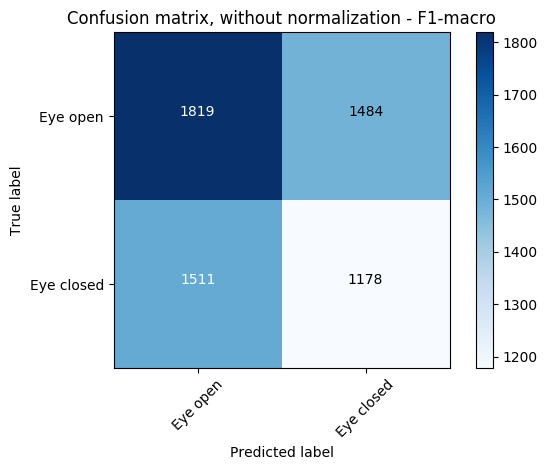

Normalized confusion matrix


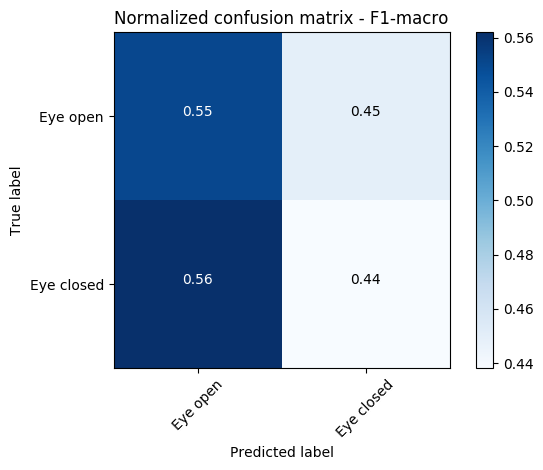

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

plt.rcdefaults()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid('off')

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min())/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 44.25%
Recall: 43.81%
F1-micro: 50.02%
F1-macro: 49.44%


### β) Gaussian Naive Bayes

#### i) F1-micro

Ο Gaussian Naive Bayes δεν έχει υπερπαραμέτρους τις οποίες μπορούμε να βελτιστοποιήσουμε, μπορούμε, όμως, να βελτιστοποιήσουμε τις παραμέτρους της προεπεξεργασίας των δεδομένων.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# construct pipeline

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)])

Όπως σχολιάσαμε και στο baseline classifiaction τα δεδομένα μας περιέχουν κάποιες προβληματικές μετρήσεις τις οποίες θα χαρακτηρίζαμε ως outliers που επιβαρύνουν δραματικά την επίδοση του ταξινομητή. Επειδή η scikit learn δε μας παρέχει με κάποιο άμεσο τρόπο την δυνατότητα να αφαιρέσουμε αυτούς τους outliers θα το κάνουμε με το χέρι.

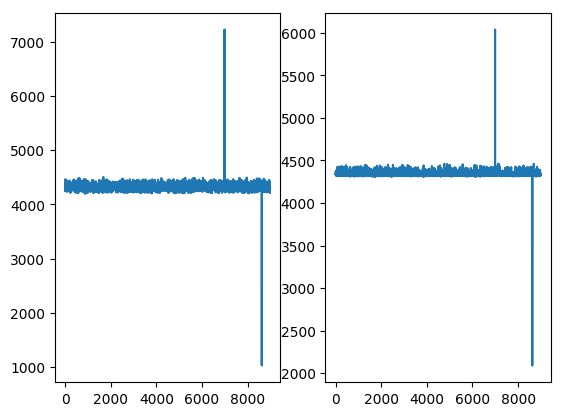

In [0]:
plt.subplot(1,2,1)
plt.plot(X_train[:,0])
plt.subplot(1,2,2)
plt.plot(X_train[:,4])
plt.show()

Οι outliers που βλέπουμε στις παραπάνω γραφικές επιδρούν έντονα πάνω στη μέση τιμή και τη διασπορά του train set και επομένως ο ταξινομητής δεν υπολογίζει σωστά τις a priori πιθανότητες.

In [0]:
print(sorted(np.var(X_train, axis=0)))
print(sorted(np.mean(X_train, axis=0)))

[757.8725776591982, 794.4766578792509, 1031.1718479826486, 1164.7171546338243, 1166.271081626654, 1223.0197098078477, 1376.4415323853996, 1482.356559270891, 1844.3027940245768, 2520.5931789678416, 3579.255288884918, 5484.492643052441, 14254150.227684092, 56325048.61363976]
[4009.9722185135815, 4072.975884512681, 4121.991606586572, 4200.961794615046, 4201.955231419654, 4231.518613707174, 4263.661379617264, 4279.14391299512, 4301.390016688942, 4341.296128170885, 4440.218111927022, 4604.932537461051, 4615.953377837099, 4659.431275033365]


In [0]:
# detect outliers in tain set

maxind = list(np.argmax(X_train, axis=0)) 
minind = list(np.argmin(X_train, axis=0))
ind = maxind + minind
ind = sorted(list(set(ind)))
print(ind)

[3816, 6221, 6500, 6991, 8623, 8687]


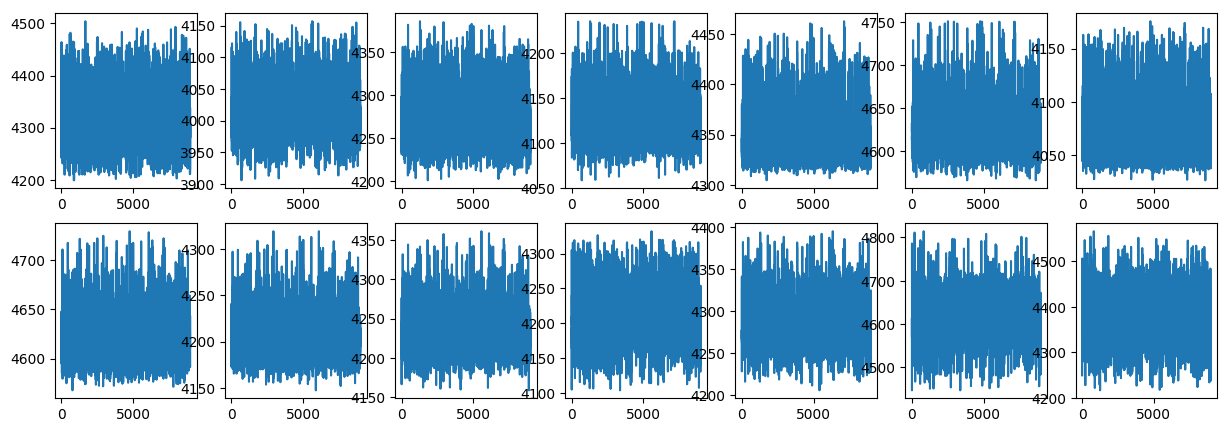

In [0]:
# construct new dataset without those outliers

X_clean = np.delete(X_train, ind, axis=0)
y_clean = np.delete(y_train, ind, axis=0)

plt.figure(figsize=(15,5))
for i in range(14):
  plt.subplot(2, 7, i+1)
  plt.plot(X_clean[:,i])
plt.show()

# new plots are much more clear

In [0]:
# new mean and variance should result in gaussians
# that are better aproximations of the dataset

print(sorted(np.var(X_clean, axis=0)))
print(sorted(np.mean(X_clean, axis=0)))

[279.5163493284, 305.41454988590255, 320.80472840324114, 325.26613774912846, 377.948663397586, 391.80427195824575, 426.185754741911, 429.8211357664981, 436.451187907047, 590.2564279199761, 911.6451727689537, 1119.0406585510125, 1434.3772229890292, 1494.031174074764]
[4009.5455911823724, 4072.770448675125, 4122.200645735928, 4201.228782008464, 4201.936783567117, 4231.017941438441, 4263.835965263857, 4278.952419283027, 4301.39083166335, 4341.347637497206, 4361.351912714325, 4605.890505455348, 4615.572997105304, 4619.807270095736]


In [0]:
# set search space

vthreshold = [0]
n_components = [8, 10, 11, 12, 14]
whiten = [True, False]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, pca__whiten=whiten), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
import time
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Συνολικός χρόνος fit: 3.1932551860809326 seconds


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


In [0]:
estimator.best_params_

{'pca__n_components': 14, 'pca__whiten': True, 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.6740146960587843

Όπως βλέπουμε το gridsearch επέλεξε ως __καλύτερη παράμετρο για τη PCA τις 14 συνιστώσες__, δηλαδή να μην αφαιρέσει καμία συνίστώσα από το dataset. Για τη παράμετρο `vthreshold` έχουμε δώσει μόνο τη τιμή 0 αλλά αυτό είναι γιατί αν δώσουμε μια τιμή που αφαιρεί κάποια από τα features δεν θα μπορούσαμε να εξετάσουμε την τιμη 14 για τα `n_components` γιατί τα χαρακτηριστικά θα ήταν ήδη λιγότερα από 14. __Δοκιμάσαμε__ όμως και άλλες περιοχές του χώρου των παραμέτρων με μικρότερο άνω όριο στο `n_components` __και τις τιμές 0, 295, 310, 323, 380, 410 για το `vthreshold`__. Κάθε φορά όμως __το gridsearch επέστρεφε την τιμή 0 για το `vthreshold` στο `best_params_`__. Άρα γενικά __ο συγκεκριμένος ταξινομητής δεν φαίνεται να επωφελείται από τη μείωση του χώρου των χαρακτηριστικών__. Επειδή όμως η PCA περιστρέφει τον χώρο των χαρακτηριστικών και αυτό επιδρά στις γκαουσσιανές που καταστευάζει ο GNB δοκιμάζουμε και την αρχιτεκτονική χωρίς την PCA.

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('gnb', clf)])

vthreshold = [0, 295, 310, 323, 380, 410, 430, 450]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Συνολικός χρόνος fit: 0.46954774856567383 seconds


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [0]:
estimator.best_params_

{'selector__threshold': 410}

In [0]:
estimator.best_score_

0.6279225116900468

Με βάση το cross validation ο ταξινομιτής έχει χειρότερη απόδοση χωρίς το στάδιο της PCA. Κρατάμε τις υπερπαραμέτρους που μας έδωσε το προηγούμενο grid search ως τις βέλτιστες και αξιολογούμε τον ταξινομιτή πάνω σε αυτές. Αφαιρούμε το στάδιο του selector γιατί με την τιμή 0 δεν μετασχηματιζεί ουσιαστικά τα δεδομένα μας.

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

pipe.fit(X_clean, y_clean)
y_pred = pipe.predict(X_test)

Confusion matrix, without normalization


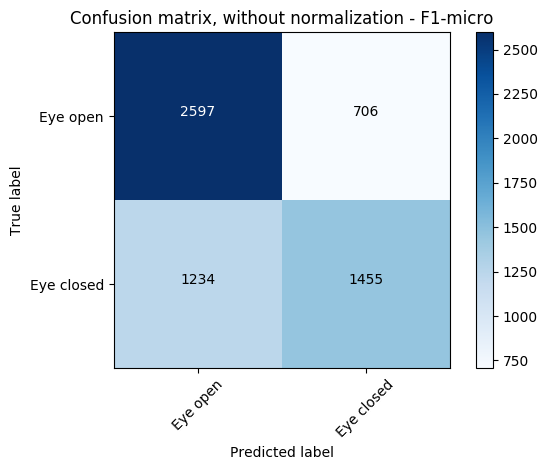

Normalized confusion matrix


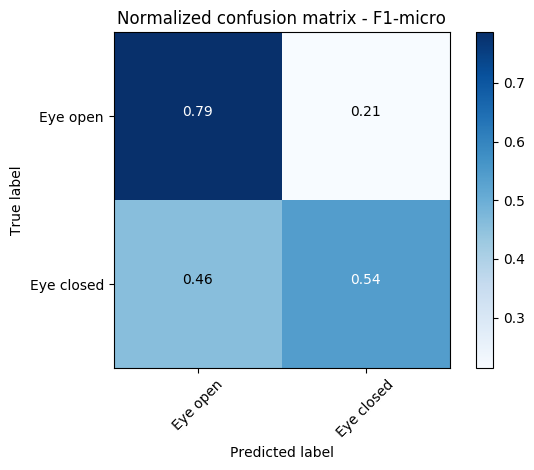

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-micro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-micro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 67.33%
Recall: 54.11%
F1-micro: 67.62%
F1-macro: 66.40%


#### ii) F1-macro

Κάνουμε τώρα την ίδια αναζήτηση αλλά με μετρική την F1-macro

In [0]:
# construct pipeline

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', clf)])

In [0]:
vthreshold = [0]
n_components = [8, 10, 11, 12, 13, 14]
whiten = [True, False]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, pca__whiten=whiten), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Συνολικός χρόνος fit: 3.6021900177001953 seconds


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished


In [0]:
estimator.best_params_

{'pca__n_components': 14, 'pca__whiten': True, 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.6606862154135701

Οι μετρικές F1-micro, F1-macro αναμένουμε να κυμαίνονται με παρόμοιο τρόπο σε αυτό το dataset γιατί το πρόβλημα είναι binary και το dataset ισορροπημένο. Προέκυψαν επομένως, όπως είναι αναμενόμενο, οι ίδιες τιμές στις υπερπαραμέτρους ως βέλτιστες.

Δοκιμάζουμε και πάλι την αρχιτεκτονική του pipeline χωρίς τη PCA.

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('gnb', clf)])

vthreshold = [0, 295, 310, 323, 380, 410]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Συνολικός χρόνος fit: 0.38640546798706055 seconds


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [0]:
estimator.best_params_

{'selector__threshold': 323}

In [0]:
estimator.best_score_

0.6116132372964919

Έχουμε και πάλι χειρότερη απόδοση με αυτή την αρχιτεκτονική. Οι υπερπαράμετροι του pipeline θα είναι επομένως ακριβώς ίδιες με πριν. Είναι θεωρητικά περιττό να παρουσιάσουμε πάλι την απόδοση του ταξινομιτή, αφού θα είναι η ίδια αλλά εμείς παραθέτουμε τον κώδικα για λόγους πληρότητας.

In [0]:
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

pipe.fit(X_clean, y_clean)
y_pred = pipe.predict(X_test)

Confusion matrix, without normalization


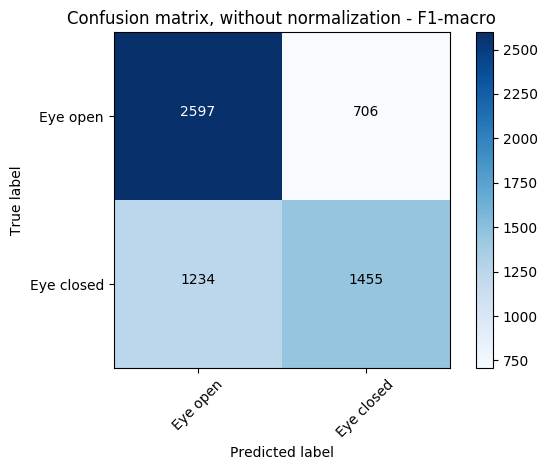

Normalized confusion matrix


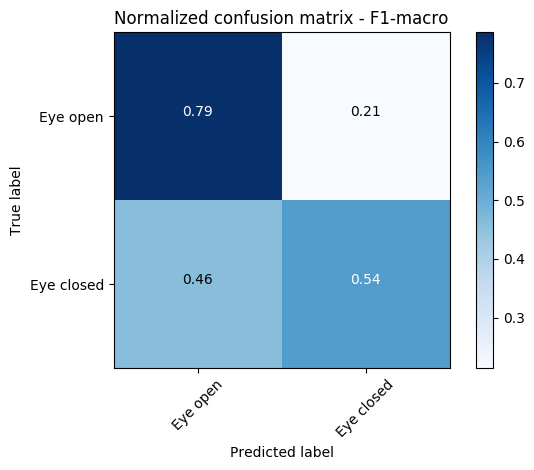

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 67.33%
Recall: 54.11%
F1-micro: 67.62%
F1-macro: 66.40%


Δοκιμάζουμε τον ίδιο ταξινομητή αλλά με εκπαίδευση πάνω στο αρχικό train set, που περιέχει και τους outliers για να δούμε πόσο επηρεάζεται η απόδοση.

In [0]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Confusion matrix, without normalization


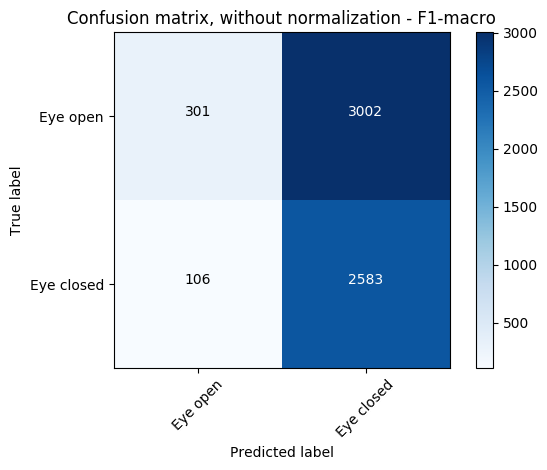

Normalized confusion matrix


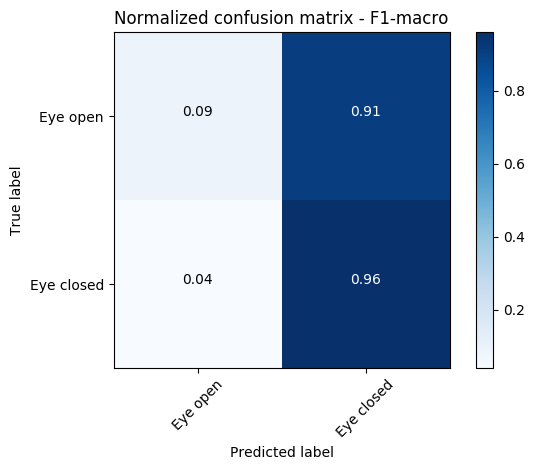

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

Όπως αναμέναμε οι outliers επηρέσαν πολύ τις κατανομές που κατασκευάζει ο GNB με αποτέλεσμα να ευνοεί διαρκώς την κλάση 1 στις προβλέψεις του.

### γ) kNN

#### i) F1-micro

Βελτιστοποιούμε τώρα και τον kNN classifier. Εδώ δεν χρειάζεται να χρησιμοποιήσουμε την εκδοχή του train set χωρίς τους outliers αφού δεν αναμένεται να επηρεάζουν την απόδοσή του. Θα χρησιμοποιήσουμε όμως διαφορειτκό scaler. Ο `RobustScaler` κανονικοποιεί τα features χωρίς να λαμβάνει υπ´οψιν του τους outliers.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

# constructing pipeline

selector = VarianceThreshold()
scaler = RobustScaler()
pca = PCA()
clf = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', clf)])

In [0]:
# selecting search space

vthreshold = [0]
n_components = [14]
whiten = [True, False]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['minkowski', 'chebyshev', 'manhattan']

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                                   pca__whiten=whiten, knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                   knn__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.2s


Συνολικός χρόνος fit: 130.0048472881317 seconds


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


In [0]:
estimator.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 1,
 'knn__weights': 'uniform',
 'pca__n_components': 14,
 'pca__whiten': False,
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9605028927458834

Ο χώρος αναζήτησης που παρουσιάζουμε και πάλι περιέχει μόνο την τιμή 0 για το vthreshold αλλά σε όσες αναζητήσεις κάναμε το grid search πάντα επέστρεφε αυτή τη τιμή στις βέλτιστες υπερπαραμέτρους.Αναζητήσαμε και πολύ μεγαλύτερες τιμές για την παράμετρο `n_neighbors` του kNN, εώς και 50 neighbors, όμως και πάλι επέλεγε πάντα την μικρότερη δυνατή τιμή. Μάλιστα, σε διαστήματα με μόνο μεγάλες τιμές επέλεγε και την τιμή `distance` για την παράμετρο `weights`  που σημαίνει ότι ο ταξινομιτής είχε καλύτερη απόδοση όταν έδινε προτεραιότητα στους κοντινούς του neighbors. Η PCA και πάλι είχε σε κάθε δοκιμή που κάναμε ως βέλτιστο πλήθος συνιστωσών τις 14. Δοκιμάζουμε να αφαιρέσουμε την PCA.

In [0]:
selector = VarianceThreshold()
scaler = RobustScaler()
clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('knn', clf)])

In [0]:
# selecting search space

vthreshold = [0, 287]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['chebyshev', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                   knn__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   15.3s


Συνολικός χρόνος fit: 91.01117706298828 seconds


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


In [0]:
estimator.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 1,
 'knn__weights': 'uniform',
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9582777036048065

Όπως βλέπουμε επιλεγεται και πάλι η ίδια τιμή για όλες τις υπερπαραμέτρους και εφόσον η τιμή του `metric` που επιλέγεται είναι η `minkowski` τα αποτελέσματα παραμένουν ακριβώς ίδια και χωρίς την περιστροφή που προκαλεί η PCA. Δοκιμάζουμε τώρα να αφαιρέσουμε τον scaler από την αρχική αρχιτεκτονική.

In [0]:
# building pipeline

pca = PCA()
clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', clf)])

In [0]:
# selecting search space

n_components = [14, 13, 12]
whiten = [True, False]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['minkowski', 'chebyshev', 'manhattan']

estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, pca__whiten=whiten, 
                                    knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                    knn__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.5min


Συνολικός χρόνος fit: 328.8898458480835 seconds


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.5min finished


In [0]:
estimator.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 3,
 'knn__weights': 'distance',
 'pca__n_components': 14,
 'pca__whiten': False}

In [0]:
estimator.best_score_

0.9628393413440143

Πήραμε καλύτερα αποτελέσματα. Δοκιμάζουμε να αφαιρέσουμε και την PCA.

In [0]:
# building pipeline

clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector), ('knn', clf)])

In [0]:
# selecting search space

n_neighbors = [1, 3, 5, 7, 11]
weights = ['uniform', 'distance']
metric = ['minkowski', 'chebyshev', 'manhattan']

estimator = GridSearchCV(pipe, dict(knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                    knn__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.5s


Συνολικός χρόνος fit: 78.16793394088745 seconds


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


In [0]:
estimator.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [0]:
estimator.best_score_

0.9619492656875834

Η προηγούμενη αρχιτεκτονική παραμένει η καλύτερη. Αξιολογούμε την αρχιτεκτονική πάνω στο test set.

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

pipe = Pipeline(steps=[('pca', pca), ('knn', clf)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Confusion matrix, without normalization


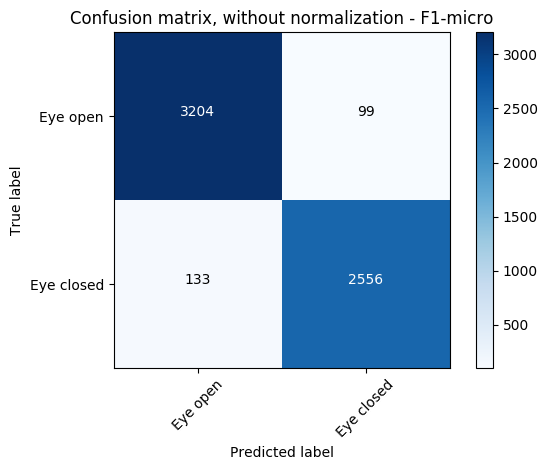

Normalized confusion matrix


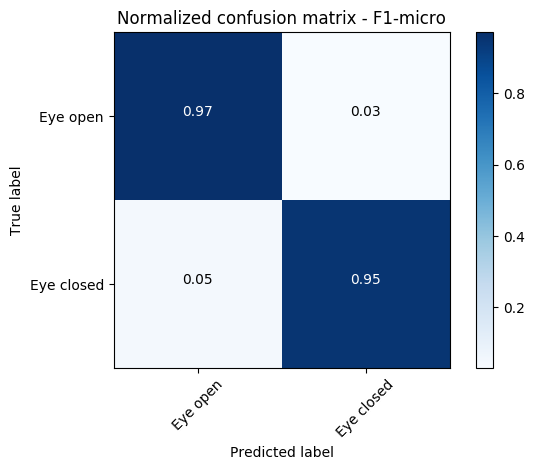

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-micro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-micro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 96.27%
Recall: 95.05%
F1-micro: 96.13%
F1-macro: 96.08%


Θα λέγαμε ότι είναι αξιοπερίεργο που ο kNN αποδίδει τόσο καλά. Τα feature μας όμως προέρχονται από μια χρονική ακολουθία η οποία, όπως μπορούμε να δούμε στην παρακάτω γραφική παράσταση, έχει σε γενικές γραμμές συνέχεια. Επομένως θα περιμέναμε ότι ο κοντινότερος γείτονας ενός δείγματος είναι ένα δείγμα κοντινό και χρονικά με αποτέλεσμα οι μετρήσεις να ανήκουν συνήθως στην ίδια κλάση.

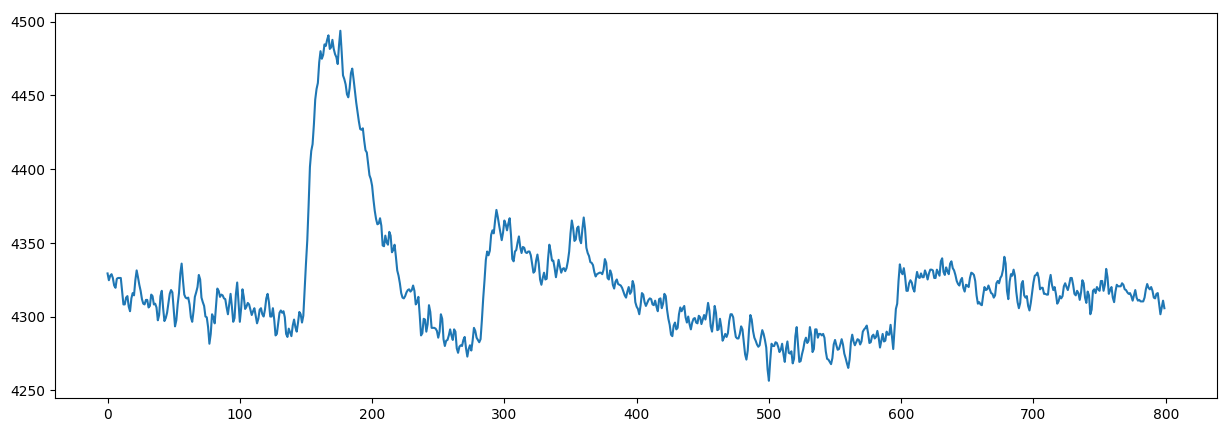

In [0]:
plt.figure(figsize=(15,5))
plt.plot(X[0:800,0])
plt.show()

#### ii) F1-macro

Επαναλαμβάνουμε τη διαδικασία με μετρική την F1-macro. Γενικά αναμένουμε οι βέλτιστες υπερπαράμετροι να είναι κοντινές με τις προηγούμενες.

In [0]:
# constructing pipeline

selector = VarianceThreshold()
scaler = RobustScaler()
pca = PCA()
clf = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', clf)])

In [0]:
# selecting search space

vthreshold = [0]
n_components = [14]
whiten = [True, False]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['chebyshev', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                                   pca__whiten=whiten, knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                   knn__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.3s


Συνολικός χρόνος fit: 131.76993918418884 seconds


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


In [0]:
estimator.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 1,
 'knn__weights': 'uniform',
 'pca__n_components': 14,
 'pca__whiten': False,
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9600756831548427

Παίρνουμε πάλι τις ίδιες τιμές για τις υπερπαραμέτρους. Δοκιμάζουμε και την αρχιτεκτονική χωρίς την PCA.

In [0]:
selector = VarianceThreshold()
scaler = RobustScaler()
clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('knn', clf)])

In [0]:
# selecting search space

vthreshold = [0, 287]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['chebyshev', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                   knn__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s


Συνολικός χρόνος fit: 91.94699764251709 seconds


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


In [0]:
estimator.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 1,
 'knn__weights': 'uniform',
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9578346700678306

Η απόδοση πέφτει. Δοκιμάζουμε, πάλι, να αφαιρέσουμε τον scaler.

In [0]:
# constructing pipeline

pca = PCA()
clf = KNeighborsClassifier()
pipe = Pipeline(steps=[('pca', pca), ('knn', clf)])

In [0]:
# selecting search space

n_components = [14, 13, 12]
whiten = [True, False]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['chebyshev', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, pca__whiten=whiten, 
                                    knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                    knn__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min


Συνολικός χρόνος fit: 319.68031215667725 seconds


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.3min finished


In [0]:
estimator.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 3,
 'knn__weights': 'distance',
 'pca__n_components': 14,
 'pca__whiten': False}

In [0]:
estimator.best_score_

0.9624136932917517

Τα αποτελέσματα βελτιώνονται. Δοκιμάζουμε πάλι να αφαιρέσουμε και την PCA.

In [0]:
# constructing pipeline

clf = KNeighborsClassifier()
pipe = Pipeline(steps=[('knn', clf)])

In [0]:
# selecting search space

n_components = [14, 13, 12]
whiten = [True, False]
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']
metric = ['chebyshev', 'manhattan', 'minkowski']

estimator = GridSearchCV(pipe, dict(knn__n_neighbors=n_neighbors, knn__weights=weights, 
                                    knn__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

In [0]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   27.2s


Συνολικός χρόνος fit: 37.11692690849304 seconds


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   37.1s finished


In [0]:
estimator.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [0]:
estimator.best_score_

0.9615725884939824

Η προηγούμενη αρχιτεκτονική παραμένει η καλύτερη.

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

pipe = Pipeline(steps=[('pca', pca), ('knn', clf)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Confusion matrix, without normalization


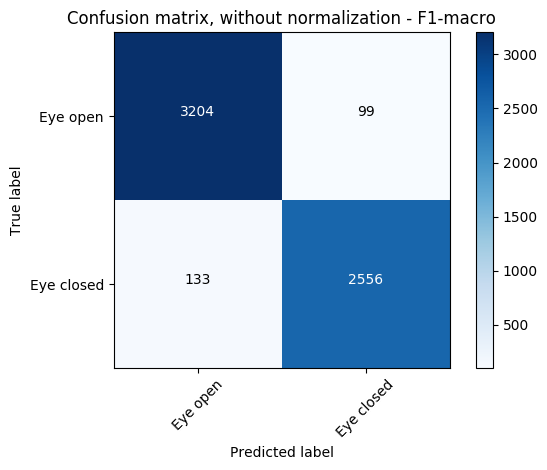

Normalized confusion matrix


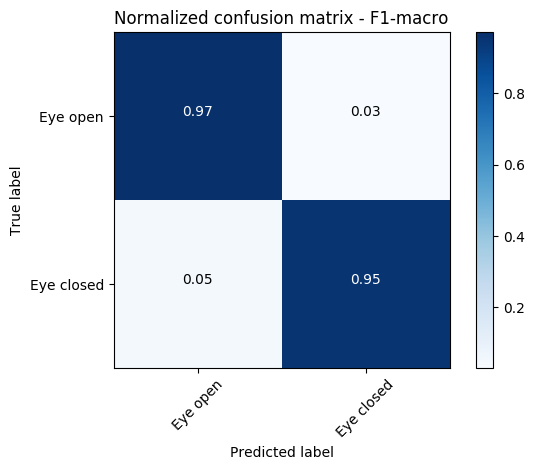

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

In [0]:
print('Precision: {:.2%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.2%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.2%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.2%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 96.27%
Recall: 95.05%
F1-micro: 96.13%
F1-macro: 96.08%


### δ) Multi-Layer Perceptron

#### i) F1-micro

Βελτιστοποιόυμε, τέλος, και το Multi-Layer Perceptron. Εδώ θα χρησιμοποιήσουμε το dataset χωρίς τους outliers καθώς όπως συζητήσαμε και στο baseline classification χαλάνε τα βάρη του νευρωνικού.

In [0]:
from sklearn.neural_network import MLPClassifier

# constructing pipeline

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', clf)])

In [0]:
# selecting search space

vthreshold = [0]
n_components = [14]
whiten = [True]
hidden_layer_sizes = [(450,)]
activation = ['relu']
solver =['adam']
max_iter = [250]
learning_rate =['adaptive']
alpha = [1e-5]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                                   pca__whiten=whiten, mlp__hidden_layer_sizes=hidden_layer_sizes, 
                                   mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, 
                                   mlp__learning_rate=learning_rate, mlp__alpha=alpha), cv=5, scoring='f1_micro', verbose=1, n_jobs=-1)

In [0]:
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Συνολικός χρόνος fit: 208.43538236618042 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
estimator.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 1e-05,
 'mlp__hidden_layer_sizes': (450,),
 'mlp__learning_rate': 'adaptive',
 'mlp__max_iter': 250,
 'mlp__solver': 'adam',
 'pca__n_components': 14,
 'pca__whiten': True,
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9631485192607437

Προφανώς αναζητήσαμε υπερπαραμέτρους σε πολύ μεγαλύτερο χώρο από αυτόν απλά επειδή οι χρόνοι γίνανε πολύ μεγάλοι κρατήσαμε μόνο μία τιμή στην τελευταία εκτέλεση του κελιού. Για το `vthreshold` και το `n_components` είδαμε τα ίδια αποτελέσματα και με τις προηγούμενες περιπτώσεις, οτι δηλαδή τα καλύτερα αποτελέσματα δίνονται όταν δεν χάνουμε καμία διάσταση. Για το `hidden_layer_size` ξεκινήσαμε την αναζήτηση τιμών από το 50 και φτάσαμε σταδιακά στο 450. Για λίγο μεγαλύτερα νούμερα δεν είδαμε καμία διαφορά, ενώ για ακόμη μεγαλύτερα είδαμε πτώση της απόδοσης, μάλλον γιατί το MLP έγινε υπερβολικά μεγάλο σε σχέση με τον όγκο των δεδομένων που έχουμε διαθέσιμα για την εκπαίδευση. Όσον αφορά τα `activation`, `solver` και `adaptive` ξεκινήσαμε με τις τιμές `relu`, `adam` και `adaptive` γιατί γνωρίζαμε από πείρα ότι είναι αρκετά αποτελεσματικές και όταν δοκιμάσαμε άλλες στρατηγικές στην πορεία είδαμε πτώση στην απόδοση οπότε επιστρέψαμε σε αυτές. Για το `max_iter` ξεκινήσαμε με τη τιμή 60 και φτάσαμε εως την 300. Αν και στη τιμή 250 το MLP δεν έχει φτάσει σε σύγκλιση όπως μας πληροφορεί το `ConvrgenceWarning` για μεγαλύτερες τιμές βλέπαμε πτώση στην απόδοση πιθανώς λόγω over-fitting. Τέλος για το `alpha` ξεκινήσαμε με τις τιμές `1e-3, 1e-4, 1e-5` με καλύτερη απόδοση να έχει η `1e-5` και τη κρατήσαμε εκεί. Αργότερα δοκιμάσαμε άλλες κοντινές τιμες εντός του `0.5e-5 - 2e-5` αλλά δεν βρήκαμε τιμή με καλύτερη απόδοση.

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

pipe.fit(X_clean, y_clean)
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion matrix, without normalization


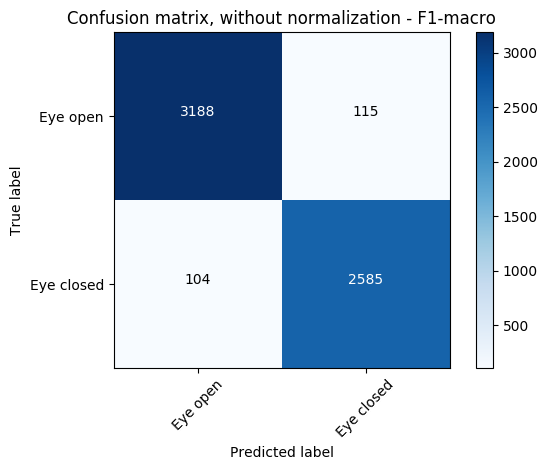

Normalized confusion matrix


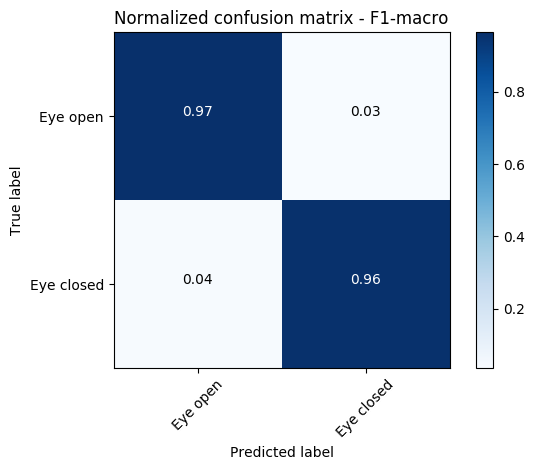

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

In [0]:
print('Precision: {:.3%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.3%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.3%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.3%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 95.741%
Recall: 96.132%
F1-micro: 96.345%
F1-macro: 96.308%


#### ii) F1-macro

Επαναλαμβάνουμε την διαδικασία για την μετρική F1-macro

In [0]:
# constructing pipeline

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', clf)])

In [0]:
# selecting search space

vthreshold = [0]
n_components = [14]
whiten = [True]
hidden_layer_sizes = [(450,)]
activation = ['relu']
solver =['adam']
max_iter = [250]
learning_rate =['adaptive']
alpha = [1e-5]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                                   pca__whiten=whiten, mlp__hidden_layer_sizes=hidden_layer_sizes, 
                                   mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, 
                                   mlp__learning_rate=learning_rate, mlp__alpha=alpha), cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

In [0]:
start_time = time.time()
estimator.fit(X_clean, y_clean)
print("Συνολικός χρόνος fit: %s seconds" % (time.time() - start_time))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


Συνολικός χρόνος fit: 212.14294695854187 seconds


In [0]:
estimator.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 1e-05,
 'mlp__hidden_layer_sizes': (450,),
 'mlp__learning_rate': 'adaptive',
 'mlp__max_iter': 250,
 'mlp__solver': 'adam',
 'pca__n_components': 14,
 'pca__whiten': True,
 'selector__threshold': 0}

In [0]:
estimator.best_score_

0.9648720782513693

Και σε αυτή τη περίπτωση εντοπίσαμε τη μέγιστη απόδοση στις ίδιες τιμές υπερπαραμέτρων. Ξεκινήσαμε από τις τιμές που είχαμε ήδη εντοπίσει για την F1-micro και δοκιμάσαμε άλλες κοντινές σε αυτές αλλά δε βρήκαμε κάποιον καλύτερο συνδυασμό.

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

pipe.fit(X_clean, y_clean)
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion matrix, without normalization


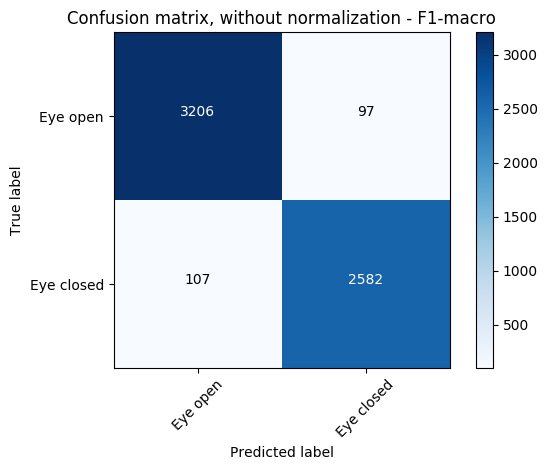

Normalized confusion matrix


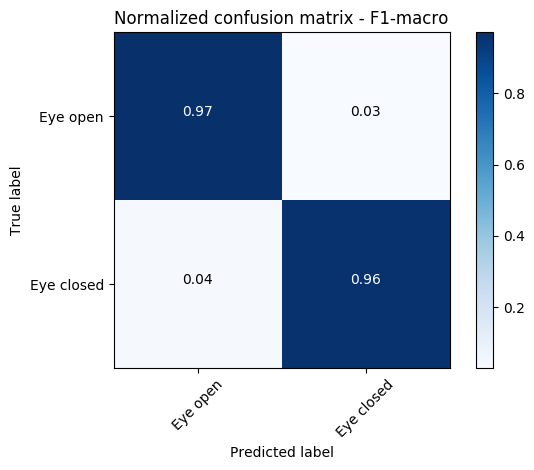

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Eye open', 'Eye closed']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization - F1-macro')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - F1-macro')

plt.show()

In [0]:
print('Precision: {:.3%}'.format(precision_score(y_test, y_pred, average='binary')))
print('Recall: {:.3%}'.format(recall_score(y_test, y_pred, average='binary')))
print('F1-micro: {:.3%}'.format(f1_score(y_test, y_pred, average='micro')))
print('F1-macro: {:.3%}'.format(f1_score(y_test, y_pred, average='macro')))

Precision: 96.379%
Recall: 96.021%
F1-micro: 96.595%
F1-macro: 96.558%


### Χρόνοι εκτέλεσης

Παρακάτω παρουσιάζουμε τους χρόνους fit και predict. Όπως μπορούμε να δούμε ο χρόνος του dummy είναι αναμενόμενα ο καλύτερος αφου δεν επεξεργάζεται καθόλου τα δεδομένα. Αμέσως καλύτερος είναι ο χρόνος του Gaussian Naive Bayes που έχει πολύ γρήγορο και fit και predict. Οι άλλοι δυο ταξινομητές έχουν σαφώς χειρότερους χρόνους με το αδύναμο σημείο του kNN να είναι το predict και του MLP να είναι το fit. Αν και ο συνολικός χρόνος του MLP είναι πολύ χειρότερος από αυτόν του kNN, το fit θα γίνει μία φορά για τον κάθε ταξινομητή ενώ άμα αρχίσουμε να τον χρησιμοποιούμε μετά για να μας κατηγοριοποιεί μετρήσεις η πράξη του predict θα γίνεται επανειλημμένα. Άρα μακροπρόθεσμα θα λέγαμε ότι ο MLP υπερέχει χρονικά του kNN.

#### i) F1-micro

In [0]:
fit_time = {}
predict_time = {}

In [0]:
clf = DummyClassifier(strategy='constant', constant=0)

start_time = time.time()
clf.fit(X_train, y_train)
fit_time['dummy'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['dummy'] = time.time() - start_time

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

start_time = time.time()
clf.fit(X_clean, y_clean)
fit_time['gnb'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['gnb'] = time.time() - start_time

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

clf = Pipeline(steps=[('pca', pca), ('knn', clf)])

start_time = time.time()
clf.fit(X_train, y_train)
fit_time['knn'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['knn'] = time.time() - start_time

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

start_time = time.time()
clf.fit(X_clean, y_clean)
fit_time['mlp'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['mlp'] = time.time() - start_time

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print('_'*8 + '|Fit time\t|Predict time')
print('Dummy\t|{:.5f}s\t|{:.5f}s'.format(fit_time['dummy'], predict_time['dummy']))
print('GNB\t|{:.5f}s\t|{:.5f}s'.format(fit_time['gnb'], predict_time['gnb']))
print('kNN\t|{:.5f}s\t|{:.5f}s'.format(fit_time['knn'], predict_time['knn']))
print('MLP\t|{:.5f}s\t|{:.5f}s'.format(fit_time['mlp'], predict_time['mlp']))

________|Fit time	|Predict time
Dummy	|0.00170s	|0.00020s
GNB	|0.02408s	|0.01446s
kNN	|0.01830s	|0.79950s
MLP	|37.19022s	|0.04050s


#### ii) F1-macro

In [0]:
fit_time = {}
predict_time = {}

In [0]:
clf = DummyClassifier(strategy='stratified')

start_time = time.time()
clf.fit(X_train, y_train)
fit_time['dummy'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['dummy'] = time.time() - start_time

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

start_time = time.time()
clf.fit(X_clean, y_clean)
fit_time['gnb'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['gnb'] = time.time() - start_time

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

clf = Pipeline(steps=[('pca', pca), ('knn', clf)])

start_time = time.time()
clf.fit(X_train, y_train)
fit_time['knn'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['knn'] = time.time() - start_time

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

start_time = time.time()
clf.fit(X_clean, y_clean)
fit_time['mlp'] = time.time() - start_time

start_time = time.time()
y_pred = clf.predict(X_test)
predict_time['mlp'] = time.time() - start_time

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print('_'*8 + '|Fit time\t|Predict time')
print('Dummy\t|{:.5f}s\t|{:.5f}s'.format(fit_time['dummy'], predict_time['dummy']))
print('GNB\t|{:.5f}s\t|{:.5f}s'.format(fit_time['gnb'], predict_time['gnb']))
print('kNN\t|{:.5f}s\t|{:.5f}s'.format(fit_time['knn'], predict_time['knn']))
print('MLP\t|{:.5f}s\t|{:.5f}s'.format(fit_time['mlp'], predict_time['mlp']))

________|Fit time	|Predict time
Dummy	|0.00152s	|0.00070s
GNB	|0.02262s	|0.00392s
kNN	|0.02242s	|0.86787s
MLP	|37.45581s	|0.03976s


### Bar plots

Εδώ παρατηρούμε ότι η επίδοση του Dummy και του Gaussian Naive Bayes είναι αρκετά απογοητευτική. Οι kNN, MLP έχουν εξαιρετικές επιδόσεις με τον kNN να έχει λίγο υψηλότερη F1-micro και τον MLP να έχει λίγο υψηλότερη F1-macro.

#### i) F1-micro

In [0]:
new_f1_micro = {}

In [0]:
clf = DummyClassifier(strategy='constant', constant=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

new_f1_micro['dummy'] = f1_score(y_test, y_pred, average='micro')

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

clf.fit(X_clean, y_clean)
y_pred = clf.predict(X_test)

new_f1_micro['gnb'] = f1_score(y_test, y_pred, average='micro')

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

clf = Pipeline(steps=[('pca', pca), ('knn', clf)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

new_f1_micro['knn'] = f1_score(y_test, y_pred, average='micro')

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

clf.fit(X_clean, y_clean)
y_pred = clf.predict(X_test)

new_f1_micro['mlp'] = f1_score(y_test, y_pred, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


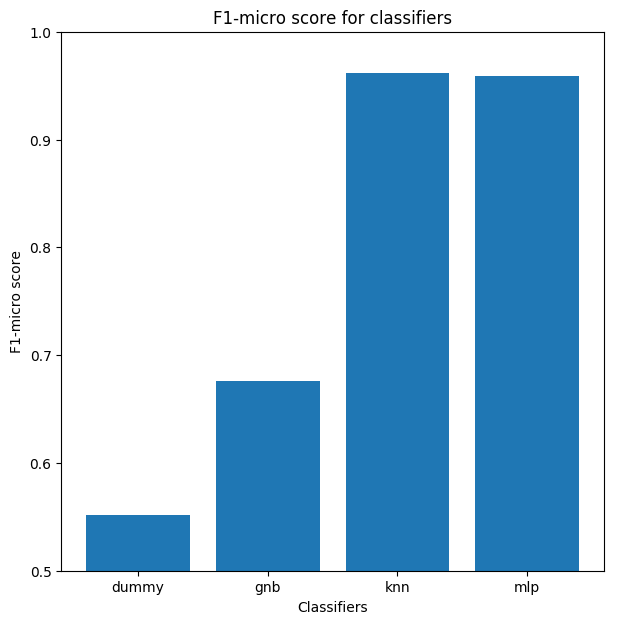

In [0]:
plt.figure(figsize=(7,7))
plt.bar(range(1,5), new_f1_micro.values())
plt.xticks(range(1,5), new_f1_micro.keys())
plt.ylim(0.5, 1.0)
plt.grid('off')
plt.xlabel('Classifiers')
plt.ylabel('F1-micro score')
plt.title('F1-micro score for classifiers')
plt.show()

#### ii) F1-macro

In [0]:
new_f1_macro = {}

In [0]:
clf = DummyClassifier(strategy='stratified',)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

new_f1_macro['dummy'] = f1_score(y_test, y_pred, average='macro')

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = GaussianNB()

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', clf)])

clf.fit(X_clean, y_clean)
y_pred = clf.predict(X_test)

new_f1_macro['gnb'] = f1_score(y_test, y_pred, average='macro')

In [0]:
pca = PCA(n_components=14, whiten=False)
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

clf = Pipeline(steps=[('pca', pca), ('knn', clf)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

new_f1_macro['knn'] = f1_score(y_test, y_pred, average='macro')

In [0]:
scaler = StandardScaler()
pca = PCA(n_components=14, whiten=True)
clf = MLPClassifier(hidden_layer_sizes=(450,), activation='relu', solver='adam',
                   max_iter=250, learning_rate='adaptive', alpha=1e-5)

clf = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlp', clf)])

clf.fit(X_clean, y_clean)
y_pred = clf.predict(X_test)

new_f1_macro['mlp'] = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


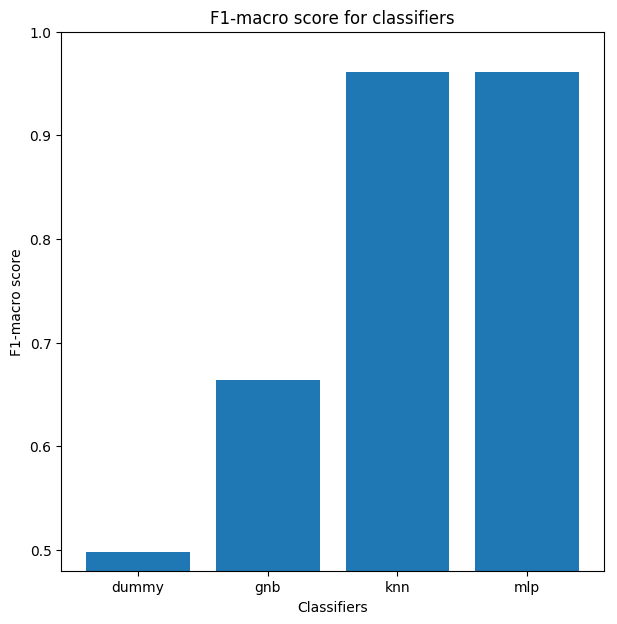

In [0]:
plt.figure(figsize=(7,7))
plt.bar(range(1,5), new_f1_macro.values())
plt.xticks(range(1,5), new_f1_macro.keys())
plt.ylim(0.48, 1.0)
plt.grid('off')
plt.xlabel('Classifiers')
plt.ylabel('F1-macro score')
plt.title('F1-macro score for classifiers')
plt.show()

### Μεταβολή επίδοσης

Σημαντική μεταβολή παρατηρούμε στους Gaussian Naive Bayes και Multi-Layer Perceptron καθώς ήταν πολύ ευαίσθητοι στους outliers του dataset. Ο kNN είχε ήδη εξαιρετική επίδοση κι επομένως ήταν δύσκολο να αυξηθεί αρκετά ακόμα.

In [0]:
# dummy

print('-'*14 + 'Dummy Classifier' + '-'*14)
print('_'*16 + '|Old\t|New\t|Difference')
print('F1-micro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_micro['dummy'], 
              new_f1_micro['dummy'], new_f1_micro['dummy'] - f1_micro['dummy']))
print('F1-macro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_macro['dummy'], 
              new_f1_macro['dummy'], new_f1_macro['dummy'] - f1_macro['dummy']))

--------------Dummy Classifier--------------
________________|Old	|New	|Difference
F1-micro	|49.62%	|55.12%	|5.51%
F1-macro	|49.00%	|49.81%	|0.81%


In [0]:
# gnb

print('-'*15 + 'GNB Classifier' + '-'*15)
print('_'*16 + '|Old\t|New\t|Difference')
print('F1-micro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_micro['gnb'], 
              new_f1_micro['gnb'], new_f1_micro['gnb'] - f1_micro['gnb']))
print('F1-macro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_macro['gnb'], 
              new_f1_macro['gnb'], new_f1_macro['gnb'] - f1_macro['gnb']))

---------------GNB Classifier---------------
________________|Old	|New	|Difference
F1-micro	|46.38%	|67.62%	|21.24%
F1-macro	|36.50%	|66.40%	|29.90%


In [0]:
# knn

print('-'*15 + 'kNN Classifier' + '-'*15)
print('_'*16 + '|Old\t|New\t|Difference')
print('F1-micro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_micro['knn'], 
              new_f1_micro['knn'], new_f1_micro['knn'] - f1_micro['knn']))
print('F1-macro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_macro['knn'], 
              new_f1_macro['knn'], new_f1_macro['knn'] - f1_macro['knn']))

---------------kNN Classifier---------------
________________|Old	|New	|Difference
F1-micro	|95.06%	|96.13%	|1.07%
F1-macro	|95.00%	|96.08%	|1.08%


In [0]:
# mlp

print('-'*15 + 'MLP Classifier' + '-'*15)
print('_'*16 + '|Old\t|New\t|Difference')
print('F1-micro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_micro['mlp'], 
              new_f1_micro['mlp'], new_f1_micro['mlp'] - f1_micro['mlp']))
print('F1-macro\t|{:.2%}\t|{:.2%}\t|{:.2%}'.format(f1_macro['mlp'], 
              new_f1_macro['mlp'], new_f1_macro['mlp'] - f1_macro['mlp']))

---------------MLP Classifier---------------
________________|Old	|New	|Difference
F1-micro	|55.29%	|95.93%	|40.64%
F1-macro	|53.66%	|96.13%	|42.46%


Σε γενικές γραμμές θα λέγαμε ότι ο Gaussian Naive Bayes φαίνεται κακή επιλογή για το dataset. Αν και η επίδοση του αυξάνεται αρκετά μετά τη βελτιστοποίηση, δεν ξεπερνάει το 70%. Από την άλλη, ο kNN και ο MLP αναδεικνύονται ως ισχυρά εργαλεία. Ο kNN δίνει πολύ καλά αποτελέσματα χωρίς να χρειάζεται ιδιαίτερο κόπο η εκπαίδευσή του. Ο MLP θέλει αρκετή δουλεία για να φτάσει τον kNN καθώς απαιτεί πολύ διεξοδική και χρονοβόρα αναζήτηση στις υπερπαραμέτρους, όμως αφού εντοπιστούν καλές τιμές και εκπαιδευτεί το μοντέλο εκτελεί την εργασία της κατηγοριοποίησης με άριστη ταχύτητα.